# <font color="#690fad">State of Data 2021</font>
-------


Análise Exploratória de Dados (AED)
- Analisar os dados da pesquisa State of Data 2021;
- O maior e mais completo panorama sobre o mercado de trabalho brasileiro na área de dados;
- Pesquisa foi realizada entre 18 de outubro de 2021 e 6 de dezembro de 2021;

Fonte da pesquisa: www.stateofdata.com.br





#### <font color="#690fad">Objeto do Estudo</font>

- Entender quais características dos profissionais podem ter alguma relação com a remuneração.
- Variável: ('P2_h ', 'Faixa salarial')

Fonte dos dados: https://www.kaggle.com/datasets/datahackers/state-of-data-2021








-------  



In [220]:
import numpy as np
import pandas as pd 
import re

from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib_venn import venn3, venn3_circles

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

sns.set_style("darkgrid", {"grid.color": ".7", "grid.linestyle": ":"})

In [237]:
df = pd.read_csv('./dados/State of Data 2021 - Dataset - Pgina1.csv', low_memory=False)
df.shape

(2645, 356)

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2645 entries, 0 to 2644
Columns: 356 entries, ('P0', 'id') to ('P9_a_g ', 'Ainda não conhecia o Data Hackers')
dtypes: float64(293), int64(7), object(56)
memory usage: 7.2+ MB


## <font color="#690fad">Uma visão sobre a remuneração da carreira de dados</font>
  
  **"Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?"** <br>
  
  Mais de 70% dos respondentes levam em consideração a Remuneração/Salário no momento de decidir onde trabalhar.
  

In [314]:
df["('P2_o_a ', 'Remuneração/Salário')"].value_counts(normalize=True)*100

1.00   70.34
0.00   29.66
Name: ('P2_o_a ', 'Remuneração/Salário'), dtype: float64

## <font color="#690fad">Mas onde estão os melhores salários?</font>

# Faixa Salarial
  
  Nesta AED, irei utilizar a variável Faixa Salarial (*('P2_h ', 'Faixa salarial')*) como objeto de estudo em comparação com outros campos para entender quais características dos profissionais podem ter alguma relação com a remuneração. 

In [227]:
df["('P2_h ', 'Faixa salarial')"].count()

2365

In [228]:
df["('P2_h ', 'Faixa salarial')"].describe()

count                                2365
unique                                 13
top       de R$ 8.001/mês a R$ 12.000/mês
freq                                  479
Name: ('P2_h ', 'Faixa salarial'), dtype: object

In [229]:
df["('P2_h ', 'Faixa salarial')"].value_counts()

de R$ 8.001/mês a R$ 12.000/mês     479
de R$ 4.001/mês a R$ 6.000/mês      403
de R$ 6.001/mês a R$ 8.000/mês      393
de R$ 12.001/mês a R$ 16.000/mês    263
de R$ 3.001/mês a R$ 4.000/mês      183
de R$ 2.001/mês a R$ 3000/mês       180
de R$ 16.001/mês a R$ 20.000/mês    129
de R$ 1.001/mês a R$ 2.000/mês      126
de R$ 20.001/mês a R$ 25.000/mês     62
de R$ 25.001/mês a R$ 30.000/mês     43
de R$ 30.001/mês a R$ 40.000/mês     38
Acima de R$ 40.001/mês               34
Menos de R$ 1.000/mês                32
Name: ('P2_h ', 'Faixa salarial'), dtype: int64

In [238]:
# Codificando as faixas salariais para numérico
dicio_faixa_salarial = dict()
dicio_faixa_salarial = {
                            "Menos de R$ 1.000/mês" : 1,
                            "de R$ 1.001/mês a R$ 2.000/mês" : 2,
                            "de R$ 2.001/mês a R$ 3000/mês" : 3,
                            "de R$ 3.001/mês a R$ 4.000/mês" : 4,
                            "de R$ 4.001/mês a R$ 6.000/mês" : 5,
                            "de R$ 6.001/mês a R$ 8.000/mês" : 6,
                            "de R$ 8.001/mês a R$ 12.000/mês" : 7,
                            "de R$ 12.001/mês a R$ 16.000/mês" : 8,
                            "de R$ 16.001/mês a R$ 20.000/mês" : 9,
                            "de R$ 20.001/mês a R$ 25.000/mês" : 10,
                            "de R$ 25.001/mês a R$ 30.000/mês" : 11,
                            "de R$ 30.001/mês a R$ 40.000/mês" : 12,
                            "Acima de R$ 40.001/mês" : 13
                            }


In [239]:
# Criando uma nova coluna e mapeando com o dicionário 'dicio_faixa_salarial'
df["faixa_salarial"] = df["('P2_h ', 'Faixa salarial')"].map(dicio_faixa_salarial)

# Atualizando os NaN com 0
df["faixa_salarial"] = df["faixa_salarial"].fillna(0).astype(np.int64)

# Removendo do dataframe as linhas que não possuem faixa salarial informada
df = df.loc[df["faixa_salarial"] != 0, :]

In [240]:
df["faixa_salarial"].describe()

count   2365.00
mean       6.15
std        2.37
min        1.00
25%        5.00
50%        6.00
75%        7.00
max       13.00
Name: faixa_salarial, dtype: float64

In [241]:
# Resultado 
dfFaixaSalarial = df[["faixa_salarial", "('P2_h ', 'Faixa salarial')"]].value_counts().to_frame().reset_index()
dfFaixaSalarial["('P2_h ', 'Faixa salarial')"] = dfFaixaSalarial["('P2_h ', 'Faixa salarial')"].str.replace('$', '$\$$', regex=True)
dfFaixaSalarial.columns = ['Faixa Salarial','Descrição','Quantidade']
dfFaixaSalarial = dfFaixaSalarial.sort_values(by=["Faixa Salarial"])

#### Tabela utilizada como referência para os gráficos objetos de análise

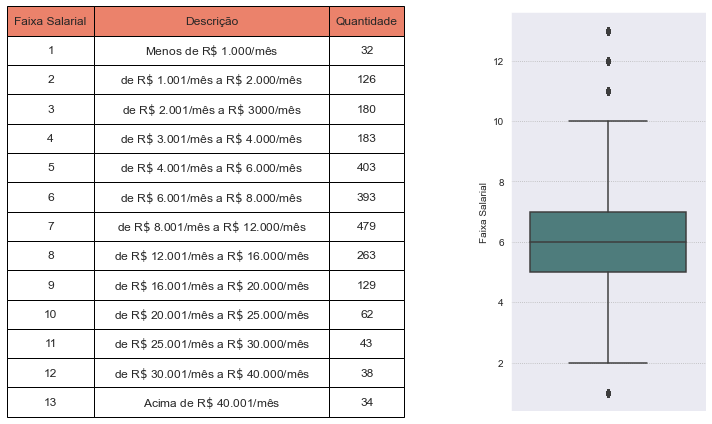

In [213]:
# Tabela utilizada como referência para os gráficos objetos de análise

fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 3]}, figsize=(10,6), tight_layout=True)

# tabela
ax[0].axis('off')
ax[0].axis('tight')
table = ax[0].table(cellText=dfFaixaSalarial.values, colLabels=dfFaixaSalarial.columns, cellLoc='center', loc='left', colColours =["#eb826b"] * 3)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(dfFaixaSalarial.columns)))) 
table.scale(3,2) 

# boxplot
sns.boxplot(data=df, y="faixa_salarial", color="#468484", ax=ax[1]).set(xlabel='', ylabel='Faixa Salarial')

fig.tight_layout()
plt.show()

<AxesSubplot:xlabel='faixa_salarial', ylabel='Density'>

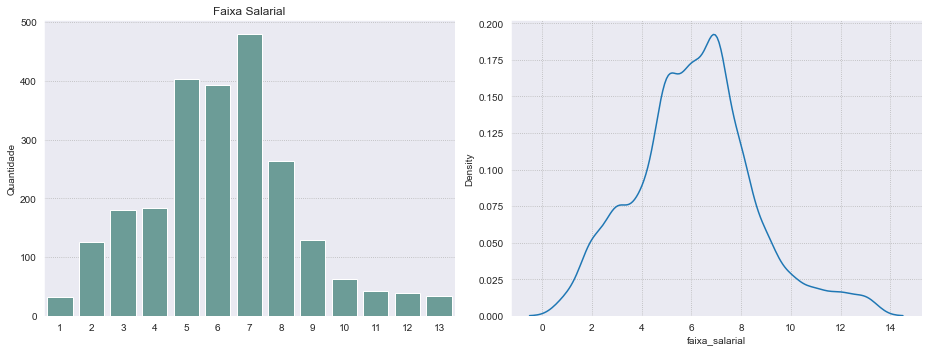

In [250]:
figura, graficos = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 1]}, figsize=(13,5), tight_layout=True)

# countplot
ax = sns.countplot(data=df, x="faixa_salarial", color='#64a49d', ax=graficos[0])
ax.set(xlabel='', ylabel='Quantidade')
ax.set_title('Faixa Salarial')

# kdeplot
sns.kdeplot(data=df, x="faixa_salarial", ax=graficos[1])


In [320]:
# Mediana
# Entre R$ 6001,00/mês a R$ 8000,00/mês
int(df["faixa_salarial"].median())

6

--------------

# <font color="#690fad">Dados demográficos</font>


## Idade

In [251]:
df["('P1_a ', 'Idade')"].describe()

count   2341.00
mean      31.27
std        7.07
min       18.00
25%       26.00
50%       30.00
75%       35.00
max       54.00
Name: ('P1_a ', 'Idade'), dtype: float64

## Faixa Idade

In [311]:
idade = df["('P1_a_a ', 'Faixa idade')"].value_counts().to_frame()
idade.columns = ['Faixa Idade']
idade

,Faixa Idade
25-29,758
30-34,578
35-39,335
22-24,280
40-44,174
45-49,82
17-21,79
50-54,55
55+,24


Text(0.5, 1.0, 'Faixa Salarial x Faixa idade')

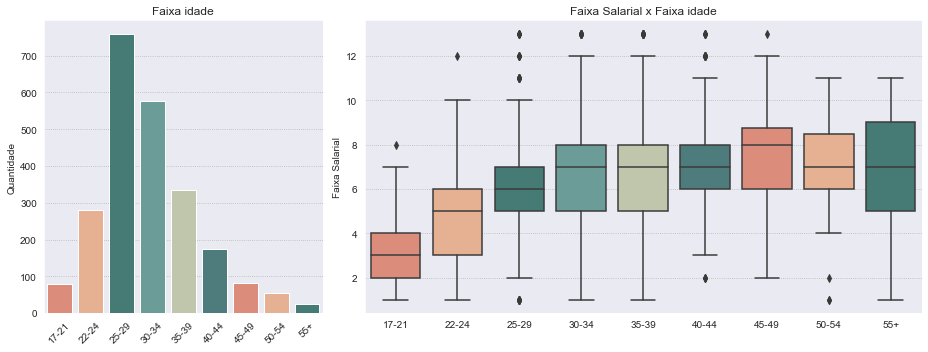

In [252]:
figura, graficos = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 4]}, figsize=(13,5), tight_layout=True)

ordem_idade = ['17-21','22-24','25-29','30-34','35-39','40-44','45-49','50-54','55+']
# countplot
ax = sns.countplot(data=df, x="('P1_a_a ', 'Faixa idade')", palette=['#eb826b','#f4ac84','#3d837b','#64a49d','#c3caa7','#468484','#eb826b','#f4ac84','#3d837b'], order=ordem_idade, ax=graficos[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set(xlabel='', ylabel='Quantidade')
ax.set_title('Faixa idade')

# boxplot
ax = sns.boxplot(data=df, y="faixa_salarial", x="('P1_a_a ', 'Faixa idade')", palette=['#eb826b','#f4ac84','#3d837b','#64a49d','#c3caa7','#468484','#eb826b','#f4ac84','#3d837b'], order=ordem_idade, ax=graficos[1])

ax.set(xlabel='', ylabel='Faixa Salarial')
ax.set_title('Faixa Salarial x Faixa idade')

## Sexo

In [261]:
sexo = df["('P1_b ', 'Genero')"].value_counts().to_frame()
sexo.columns = ['Sexo']
sexo

,Sexo
Masculino,1924
Feminino,436
Outro,5


In [265]:
df["('P1_b ', 'Genero')"].value_counts(normalize=True)*100

Masculino   81.35
Feminino    18.44
Outro        0.21
Name: ('P1_b ', 'Genero'), dtype: float64

Text(0.5, 1.0, 'Faixa Salarial x Sexo')

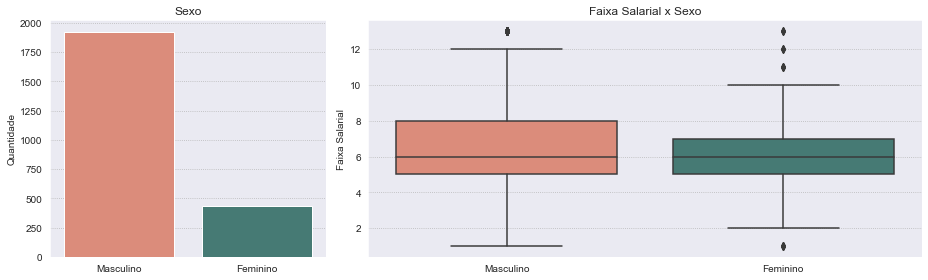

In [266]:
figura, graficos = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 4]}, figsize=(13,4), tight_layout=True)

# countplot
ax = sns.countplot(data=df[df["('P1_b ', 'Genero')"] != 'Outro'], x="('P1_b ', 'Genero')", palette=['#eb826b',"#3d837b"], ax=graficos[0])
ax.set(xlabel='', ylabel='Quantidade')
ax.set_title('Sexo')

# boxplot
ax = sns.boxplot(data=df[df["('P1_b ', 'Genero')"] != 'Outro'], y="faixa_salarial", x="('P1_b ', 'Genero')", palette=['#eb826b',"#3d837b"], ax=graficos[1])
ax.set(xlabel='', ylabel='Faixa Salarial')
ax.set_title('Faixa Salarial x Sexo')

## Região onde mora

In [267]:
regiao = df["('P1_e_b ', 'Regiao onde mora')"].value_counts().to_frame()
regiao.columns = ['Região onde mora']
regiao

,Região onde mora
Sudeste,1519
Sul,367
Nordeste,240
Centro-oeste,172
Exterior,41
Norte,26


Text(0.5, 1.0, 'Faixa Salarial x Região onde mora')

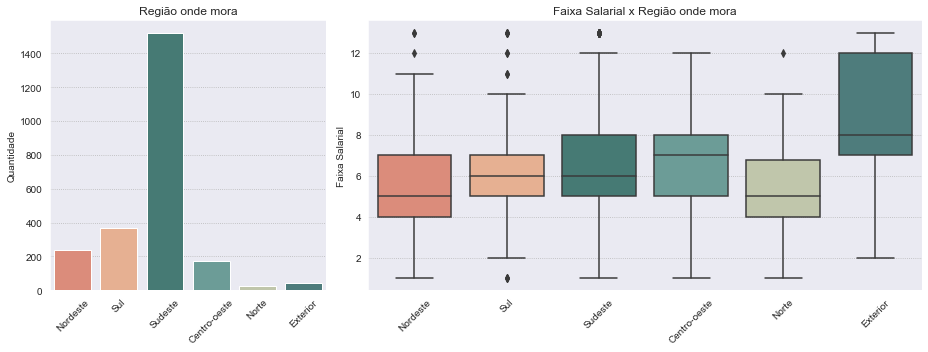

In [268]:
figura, graficos = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 4]}, figsize=(13,5), tight_layout=True)

# countplot
ax = sns.countplot(data=df, x="('P1_e_b ', 'Regiao onde mora')", palette=['#eb826b','#f4ac84','#3d837b','#64a49d','#c3caa7','#468484'], ax=graficos[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set(xlabel='', ylabel='Quantidade')
ax.set_title('Região onde mora')

# boxplot
ax = sns.boxplot(data=df, y="faixa_salarial", x="('P1_e_b ', 'Regiao onde mora')", palette=['#eb826b','#f4ac84','#3d837b','#64a49d','#c3caa7','#468484'], ax=graficos[1])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set(xlabel='', ylabel='Faixa Salarial')
ax.set_title('Faixa Salarial x Região onde mora')

## Graduação

In [269]:
graduacao = df["('P1_h ', 'Nivel de Ensino')"].value_counts().to_frame()
graduacao.columns = ['Graduação']
graduacao

,Graduação
Graduação/Bacharelado,830
Pós-graduação,778
Mestrado,307
Estudante de Graduação,299
Doutorado ou Phd,97
Não tenho graduação formal,51
Prefiro não informar,3


Text(0.5, 1.0, 'Faixa Salarial x Nível de Ensino')

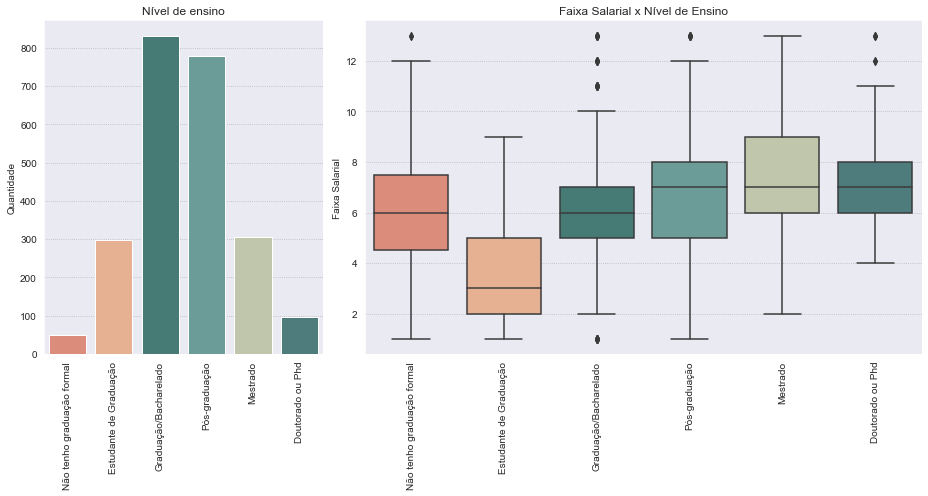

In [270]:
figura, graficos = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 4]}, figsize=(13,7), tight_layout=True)

ordem_nivel = ['Não tenho graduação formal','Estudante de Graduação','Graduação/Bacharelado','Pós-graduação','Mestrado','Doutorado ou Phd']
# countplot
ax = sns.countplot(data=df, x="('P1_h ', 'Nivel de Ensino')", palette=['#eb826b','#f4ac84','#3d837b','#64a49d','#c3caa7','#468484'], order=ordem_nivel, ax=graficos[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel='', ylabel='Quantidade')
ax.set_title('Nível de ensino')

# boxplot
ax = sns.boxplot(data=df, y="faixa_salarial", x="('P1_h ', 'Nivel de Ensino')", palette=['#eb826b','#f4ac84','#3d837b','#64a49d','#c3caa7','#468484'], order=ordem_nivel, ax=graficos[1])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel='', ylabel='Faixa Salarial')
ax.set_title('Faixa Salarial x Nível de Ensino')

# <font color="#690fad">Dados sobre carreira de dados</font>

## Situação atual de trabalho (CLT x Outros)

In [271]:
situacao = df["('P2_a ', 'Qual sua situação atual de trabalho?')"].value_counts().to_frame()
situacao.columns = ['Situação de trabalho']
situacao

,Situação de trabalho
Empregado (CLT),1737
Empreendedor ou Empregado (CNPJ),273
Estagiário,127
Servidor Público,112
Vivo no Brasil e trabalho remoto para empresa de fora do Brasil (PJ),53
Freelancer,29
Vivo fora do Brasil e trabalho para empresa de fora do Brasil,27
Prefiro não informar,7


In [272]:
df["('P2_a ', 'Qual sua situação atual de trabalho?')"].value_counts(normalize=True)*100

Empregado (CLT)                                                        73.45
Empreendedor ou Empregado (CNPJ)                                       11.54
Estagiário                                                              5.37
Servidor Público                                                        4.74
Vivo no Brasil e trabalho remoto para empresa de fora do Brasil (PJ)    2.24
Freelancer                                                              1.23
Vivo fora do Brasil e trabalho para empresa de fora do Brasil           1.14
Prefiro não informar                                                    0.30
Name: ('P2_a ', 'Qual sua situação atual de trabalho?'), dtype: float64

In [273]:
df["situação_CLT"] = df["('P2_a ', 'Qual sua situação atual de trabalho?')"] == "Empregado (CLT)"

Text(0.5, 1.0, 'Faixa Salarial x Situação Trabalho CLT')

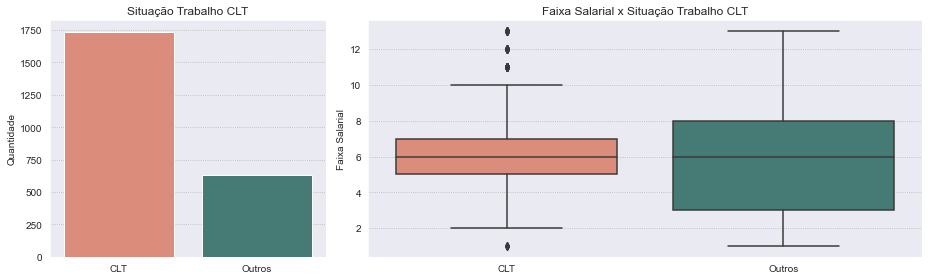

In [274]:
figura, graficos = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 4]}, figsize=(13,4), tight_layout=True)

# countplot
ax = sns.countplot(data=df, x="situação_CLT", palette=['#eb826b',"#3d837b"], order=[True, False], ax=graficos[0])
ax.set(xticklabels = (['CLT', 'Outros']))
ax.set(xlabel='', ylabel='Quantidade')
ax.set_title('Situação Trabalho CLT')

# boxplot
ax = sns.boxplot(data=df, y="faixa_salarial", x="situação_CLT", palette=['#eb826b',"#3d837b"], order=[True, False], ax=graficos[1])
plt.xticks([0, 1], ['CLT', 'Outros'])
ax.set(xlabel='', ylabel='Faixa Salarial')
ax.set_title('Faixa Salarial x Situação Trabalho CLT')

## Trabalho no Exterior

Text(0.5, 1.0, 'Faixa Salarial x Trabalho no Exterior')

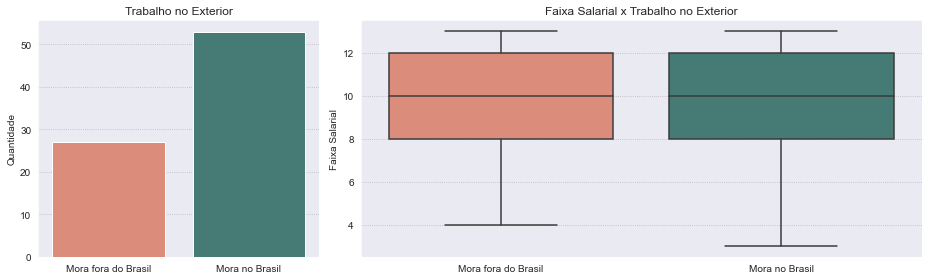

In [275]:
figura, graficos = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 4]}, figsize=(13,4), tight_layout=True)

empresa_exterior = ['Vivo fora do Brasil e trabalho para empresa de fora do Brasil','Vivo no Brasil e trabalho remoto para empresa de fora do Brasil (PJ)']
ordem_exterior = empresa_exterior

# countplot
ax = sns.countplot(data=df.loc[(df["('P2_a ', 'Qual sua situação atual de trabalho?')"].isin(empresa_exterior))], x="('P2_a ', 'Qual sua situação atual de trabalho?')", palette=['#eb826b',"#3d837b"], order=ordem_exterior, ax=graficos[0])
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xticklabels = (['Mora fora do Brasil', 'Mora no Brasil']))
ax.set(xlabel='', ylabel='Quantidade')
ax.set_title('Trabalho no Exterior')

# boxplot
ax = sns.boxplot(data=df.loc[(df["('P2_a ', 'Qual sua situação atual de trabalho?')"].isin(empresa_exterior))], y="faixa_salarial", x="('P2_a ', 'Qual sua situação atual de trabalho?')", palette=['#eb826b',"#3d837b"], order=ordem_exterior, ax=graficos[1])
plt.xticks([0, 1], ['Mora fora do Brasil', 'Mora no Brasil'])
ax.set(xlabel='', ylabel='Faixa Salarial')
ax.set_title('Faixa Salarial x Trabalho no Exterior')

## Setor

In [276]:
setor = df["('P2_b ', 'Setor')"].value_counts().to_frame()
setor.columns = ['Setor']
setor

,Setor
Tecnologia/Fábrica de Software,641
Finanças ou Bancos,388
Varejo,141
Indústria,133
Educação,129
Área da Saúde,128
Outro,122
Internet/Ecommerce,108
Setor Público,101
Marketing,80


Text(0.5, 1.0, 'Faixa Salarial x Setor')

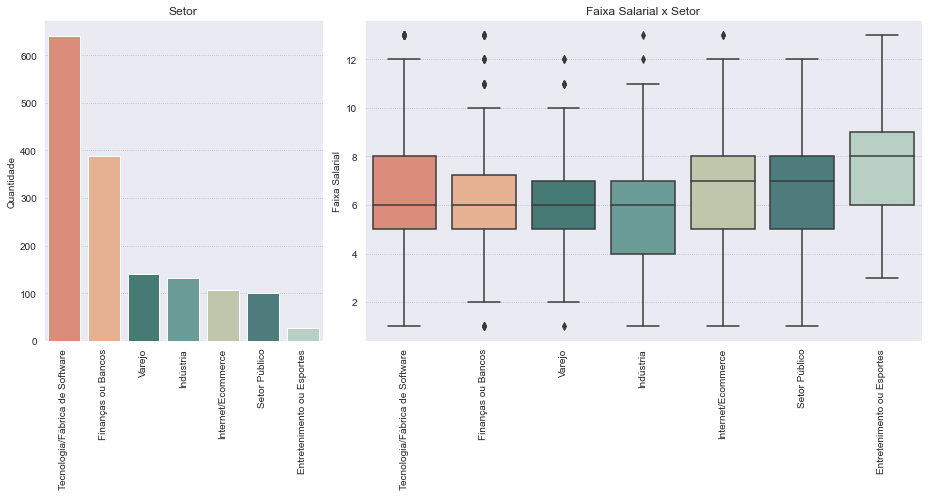

In [277]:
lista_setores = ['Tecnologia/Fábrica de Software', 'Finanças ou Bancos', 'Varejo', 'Indústria', 'Internet/Ecommerce', 'Setor Público', 'Entretenimento ou Esportes']
ordem_setores = lista_setores

figura, graficos = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 4]}, figsize=(13,7), tight_layout=True)

# countplot
ax = sns.countplot(data=df.loc[(df["('P2_b ', 'Setor')"].isin(lista_setores))], x="('P2_b ', 'Setor')", palette=['#eb826b','#f4ac84','#3d837b','#64a49d','#c3caa7','#468484','#b4d4c4'], order=lista_setores, ax=graficos[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel='', ylabel='Quantidade')
ax.set_title('Setor')


# boxplot
ax = sns.boxplot(data=df.loc[(df["('P2_b ', 'Setor')"].isin(lista_setores))], y="faixa_salarial", x="('P2_b ', 'Setor')", palette=['#eb826b','#f4ac84','#3d837b','#64a49d','#c3caa7','#468484','#b4d4c4'], order=lista_setores, ax=graficos[1])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel='', ylabel='Faixa Salarial')
ax.set_title('Faixa Salarial x Setor')


## Cargo de Gestor

In [280]:
gestor = df["('P2_d ', 'Gestor?')"].value_counts().to_frame()
gestor.columns = ['Gestor']
gestor

,Gestor
0.00,1857
1.00,508


In [281]:
df["('P2_d ', 'Gestor?')"].value_counts(normalize=True)*100

0.00   78.52
1.00   21.48
Name: ('P2_d ', 'Gestor?'), dtype: float64

Text(0.5, 1.0, 'Faixa Salarial x Cargo de Gestor')

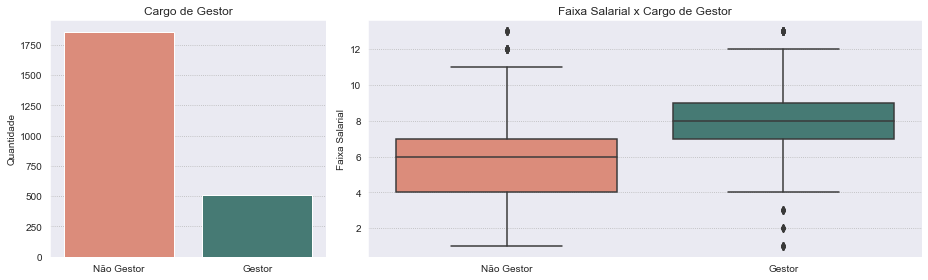

In [282]:
figura, graficos = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 4]}, figsize=(13,4), tight_layout=True)

# countplot
ax = sns.countplot(data=df, x="('P2_d ', 'Gestor?')", palette=['#eb826b',"#3d837b"], ax=graficos[0])
ax.set(xlabel='', ylabel='Quantidade')
ax.set_title('Cargo de Gestor')
ax.set(xticklabels = (['Não Gestor', 'Gestor']))

# boxplot
ax = sns.boxplot(data=df, y="faixa_salarial", x="('P2_d ', 'Gestor?')", palette=['#eb826b',"#3d837b"], ax=graficos[1])
plt.xticks([0, 1], ['Não Gestor', 'Gestor'])
ax.set(xlabel='', ylabel='Faixa Salarial')
ax.set_title('Faixa Salarial x Cargo de Gestor')

## Nível Conhecimento

In [283]:
nivel = df["('P2_g ', 'Nivel')"].value_counts().to_frame()
nivel.columns = ['Nível']
nivel

,Nível
Pleno,658
Júnior,621
Sênior,578


In [284]:
df["('P2_g ', 'Nivel')"].value_counts(normalize=True)*100

Pleno    35.43
Júnior   33.44
Sênior   31.13
Name: ('P2_g ', 'Nivel'), dtype: float64

Text(0.5, 1.0, 'Faixa Salarial x Nível do cargo')

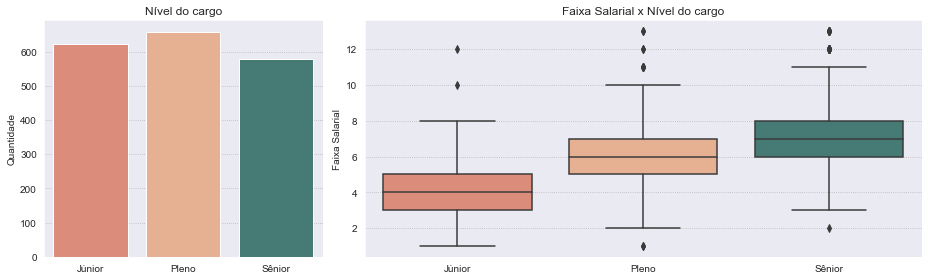

In [285]:
figura, graficos = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 4]}, figsize=(13,4), tight_layout=True)

ordem_nivel = ["Júnior","Pleno","Sênior"]
# countplot
ax = sns.countplot(data=df, x="('P2_g ', 'Nivel')", palette=['#eb826b',"#f4ac84","#3d837b"], order=ordem_nivel, ax=graficos[0])
ax.set(xlabel='', ylabel='Quantidade')
ax.set_title('Nível do cargo')

# boxplot
ax = sns.boxplot(data=df, y="faixa_salarial", x="('P2_g ', 'Nivel')", order=ordem_nivel, palette=['#eb826b',"#f4ac84","#3d837b"], ax=graficos[1])
ax.set(xlabel='', ylabel='Faixa Salarial')
ax.set_title('Faixa Salarial x Nível do cargo')


## Experiência na área de dados

In [286]:
exp = df["('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')"].value_counts().to_frame()
exp.columns = ['Experiência']
exp

,Experiência
de 2 a 3 anos,487
de 1 a 2 anos,446
de 4 a 5 anos,389
Menos de 1 ano,384
de 6 a 10 anos,276
Mais de 10 anos,261
Não tenho experiência na área de dados,122


Text(0.5, 1.0, 'Faixa Salarial x Experiência na área de dados')

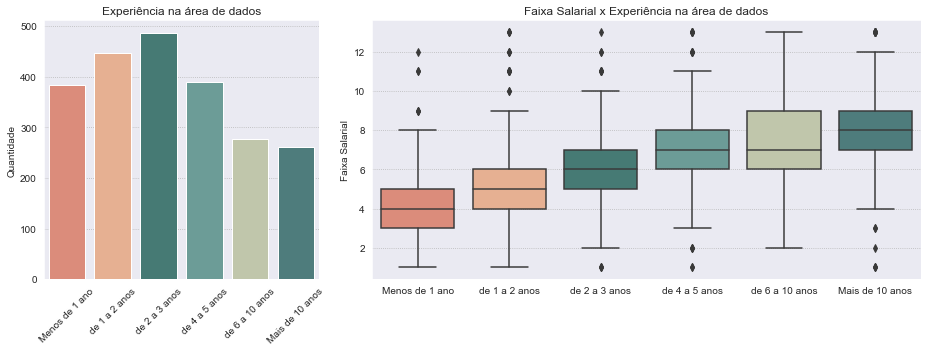

In [287]:
# não considerando 'Não tenho experiência na área de dados'
dfExperiencia = df.loc[df["('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')"] != 'Não tenho experiência na área de dados']

figura, graficos = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 4]}, figsize=(13,5), tight_layout=True)

ordem_exp = ["Menos de 1 ano","de 1 a 2 anos","de 2 a 3 anos","de 4 a 5 anos","de 6 a 10 anos","Mais de 10 anos"]
# countplot
ax = sns.countplot(data=dfExperiencia, x="('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')", order = ordem_exp, palette=['#eb826b',"#f4ac84","#3d837b","#64a49d",'#c3caa7',"#468484"], ax=graficos[0])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set(xlabel='', ylabel='Quantidade')
ax.set_title('Experiência na área de dados')

# boxplot
ax = sns.boxplot(data=df, y="faixa_salarial", x=dfExperiencia["('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')"], order=ordem_exp, palette=['#eb826b',"#f4ac84","#3d837b","#64a49d",'#c3caa7',"#468484"], ax=graficos[1])
#ax.yaxis.set_ticks([])
ax.set(xlabel='', ylabel='Faixa Salarial')
ax.set_title('Faixa Salarial x Experiência na área de dados')

## Modelo de trabalho

In [288]:
modelo = df["('P2_q ', 'Atualmente qual a sua forma de trabalho?')"].value_counts().to_frame()
modelo.columns = ['Nível']
modelo

,Nível
Modelo 100% remoto,1335
Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente),461
Modelo 100% presencial,328
Modelo híbrido com dias fixos de trabalho presencial,241


In [290]:
# Renomeando as categorias
df.loc[df["('P2_q ', 'Atualmente qual a sua forma de trabalho?')"] == 'Modelo 100% remoto', "('P2_q ', 'Atualmente qual a sua forma de trabalho?')"] = 'totalmente remoto'
df.loc[df["('P2_q ', 'Atualmente qual a sua forma de trabalho?')"] == 'Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)', "('P2_q ', 'Atualmente qual a sua forma de trabalho?')"] = 'híbrido flexível'
df.loc[df["('P2_q ', 'Atualmente qual a sua forma de trabalho?')"] == 'Modelo 100% presencial', "('P2_q ', 'Atualmente qual a sua forma de trabalho?')"] = 'totalmente presencial'
df.loc[df["('P2_q ', 'Atualmente qual a sua forma de trabalho?')"] == 'Modelo híbrido com dias fixos de trabalho presencial', "('P2_q ', 'Atualmente qual a sua forma de trabalho?')"] = 'híbrido com dias fixos'

Text(0.5, 1.0, 'Faixa Salarial x Modelo de trabalho')

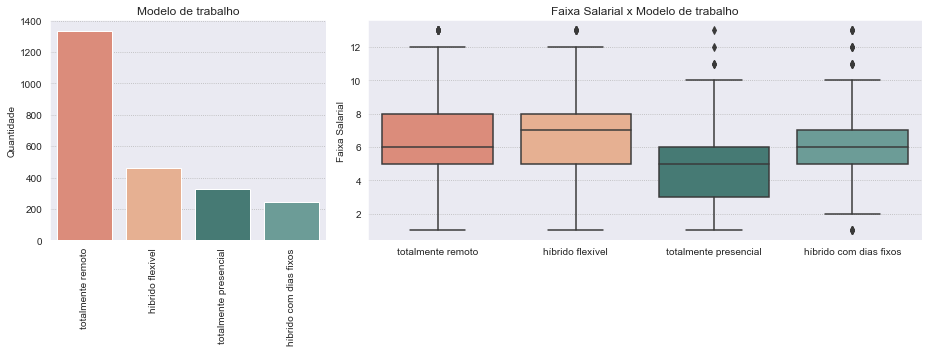

In [292]:
figura, graficos = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 4]}, figsize=(13,5), tight_layout=True)

ordem_modelo = df["('P2_q ', 'Atualmente qual a sua forma de trabalho?')"].value_counts().index
# countplot
ax = sns.countplot(data=df, x="('P2_q ', 'Atualmente qual a sua forma de trabalho?')", order=ordem_modelo, palette=['#eb826b','#f4ac84','#3d837b','#64a49d'], ax=graficos[0])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set(xlabel='', ylabel='Quantidade')
ax.set_title('Modelo de trabalho')

# boxplot
ax = sns.boxplot(data=df, y="faixa_salarial", x=df["('P2_q ', 'Atualmente qual a sua forma de trabalho?')"], order=ordem_modelo, palette=['#eb826b','#f4ac84','#3d837b','#64a49d'], ax=graficos[1])
ax.set(xlabel='', ylabel='Faixa Salarial')
ax.set_title('Faixa Salarial x Modelo de trabalho')

# <font color="#690fad">Conhecimentos na área de dados</font>

## Área de Atuação

In [293]:
atuacao = df["('P4_a ', 'Atuacao')"].value_counts().to_frame()
atuacao.columns = ['Nível']
atuacao

,Nível
Análise de Dados,849
Gestor,508
Ciência de Dados,412
Engenharia de Dados,404
Outra,192


Text(0.5, 1.0, 'Faixa Salarial x Área de Atuação')

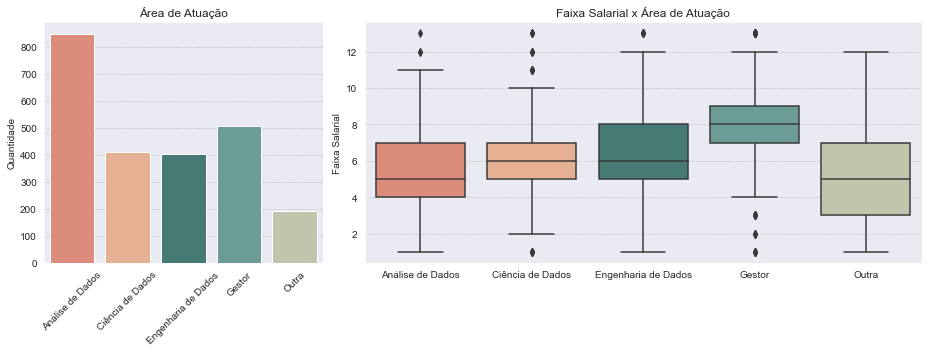

In [294]:
figura, graficos = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 4]}, figsize=(13,5), tight_layout=True)

ordem_area = ["Análise de Dados","Ciência de Dados","Engenharia de Dados","Gestor","Outra"]
# countplot
ax = sns.countplot(data=df, x="('P4_a ', 'Atuacao')", order = ordem_area, palette=['#eb826b','#f4ac84','#3d837b','#64a49d','#c3caa7'], ax=graficos[0])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set(xlabel='', ylabel='Quantidade')
ax.set_title('Área de Atuação')

# boxplot
ax = sns.boxplot(data=df, y="faixa_salarial", x=df["('P4_a ', 'Atuacao')"], order=ordem_area, palette=['#eb826b','#f4ac84','#3d837b','#64a49d','#c3caa7'], ax=graficos[1])
#ax.yaxis.set_ticks([])
ax.set(xlabel='', ylabel='Faixa Salarial')
ax.set_title('Faixa Salarial x Área de Atuação')

## Fontes de Dados
  
  Entre as fontes de dados listadas, quais você utiliza na maior parte do tempo?

In [296]:
colunas_fonte_dados = [coluna for coluna in df.columns if 'P4_c_' in coluna]
dfFonteDados = df.loc[:, colunas_fonte_dados]

# regex utilizado para renomear nome das colunas para o novo DataFrame
pesquisa = ".*'(\W){3}(.+?(?='\)))"
dicio_fonte_dados = {}

for coluna in colunas_fonte_dados:
    dfFonteDados[coluna] = df[coluna].fillna(0).astype(np.int64)  
    resultado = re.search(pesquisa, coluna)
    nome_coluna = resultado.group(2)
    dicio_fonte_dados[nome_coluna] = dfFonteDados[coluna].sum()


dicio_fonte_dados["Dados relacionais-SQL"] = dicio_fonte_dados["Dados relacionais (estruturados em bancos SQL)"]
del dicio_fonte_dados["Dados relacionais (estruturados em bancos SQL)"]

In [297]:
# dicionário para DataFrame
dfFonteDados = pd.DataFrame(list(dicio_fonte_dados.items()),columns = ['Fonte de Dados','Quantidade']) 
dfFonteDados.sort_values(by='Quantidade', ascending=False)

,Fonte de Dados,Quantidade
7,Dados relacionais-SQL,1435
5,Planilhas,1032
2,Textos/Documentos,283
0,Dados armazenados em bancos NoSQL,270
1,Imagens,51
6,Dados georeferenciados,40
3,Vídeos,5
4,Áudios,3


Text(0.5, 1.0, 'Faixa Salarial x NoSQL')

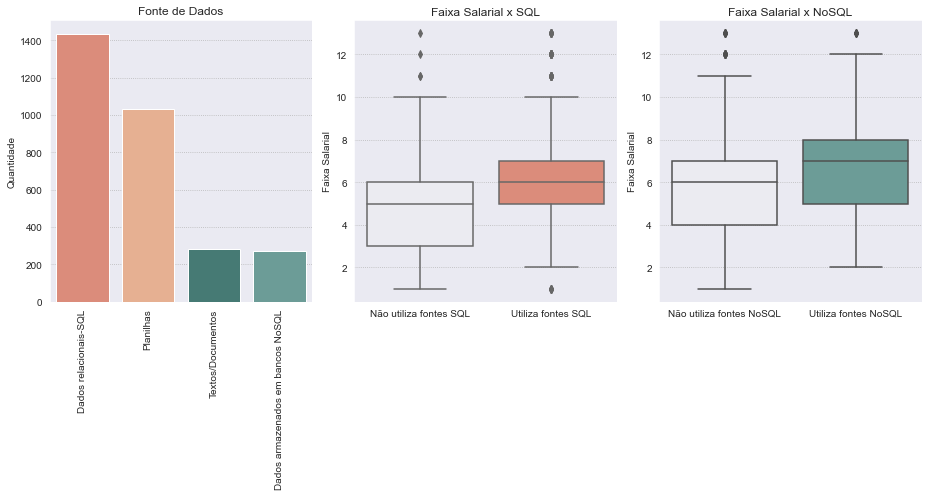

In [298]:
figura, graficos = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1,1,1]}, figsize=(13,7), tight_layout=True)

# countplot
ax = sns.barplot(data=dfFonteDados.sort_values(by='Quantidade', ascending=False).head(4), x="Fonte de Dados", y="Quantidade", palette=['#eb826b','#f4ac84','#3d837b','#64a49d'], ax=graficos[0])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set(xlabel='', ylabel='Quantidade')
ax.set_title('Fonte de Dados')

# boxplot
ax = sns.boxplot(data=df, y="faixa_salarial", x=df["('P4_c_a ', 'Dados relacionais (estruturados em bancos SQL)')"], palette=['#eaeaf2','#eb826b'], ax=graficos[1])
ax.set(xticklabels = (['Não utiliza fontes SQL', 'Utiliza fontes SQL']))
ax.set(xlabel='', ylabel='Faixa Salarial')
ax.set_title('Faixa Salarial x SQL')

# boxplot
ax = sns.boxplot(data=df, y="faixa_salarial", x=df["('P4_c_b ', 'Dados armazenados em bancos NoSQL')"], palette=['#eaeaf2','#64a49d'], ax=graficos[2])
ax.set(xticklabels = (['Não utiliza fontes NoSQL', 'Utiliza fontes NoSQL']))
ax.set(xlabel='', ylabel='Faixa Salarial')
ax.set_title('Faixa Salarial x NoSQL')

## Linguagens
  
  Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?

In [299]:
linguagem = df["('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')"].value_counts().to_frame()
linguagem.columns = ['Linguagens']
linguagem

,Linguagens
Python,736
SQL,731
Não utilizo nenhuma das linguagens listadas,166
R,81
Visual Basic/VBA,46
JavaScript,22
Scala,19
SAS/Stata,18
C/C++/C#,13
Java,12


Text(0.5, 1.0, 'Faixa Salarial x R')

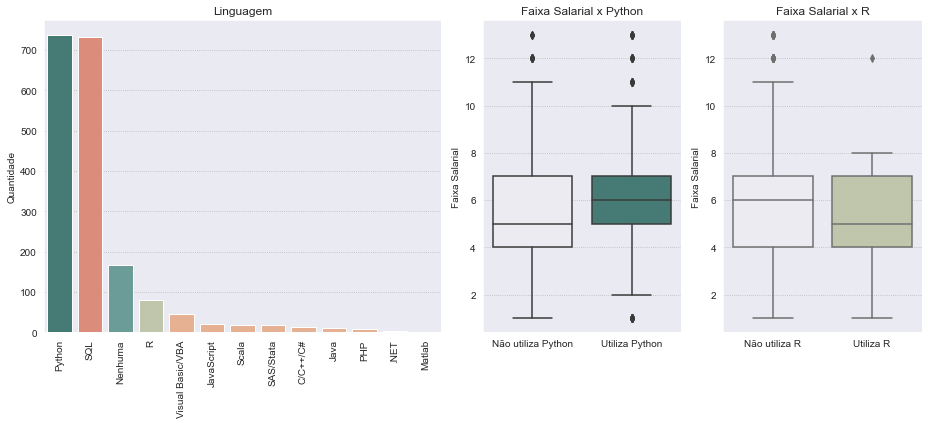

In [300]:
df.loc[df["('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')"] == 'Não utilizo nenhuma das linguagens listadas', "('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')"] = 'Nenhuma'

figura, graficos = plt.subplots(1, 3, gridspec_kw={'width_ratios': [2,1,1]}, figsize=(13,6), tight_layout=True)

# countplot
colors = ['#3d837b','#eb826b','#64a49d','#c3caa7']
for i in range(8):
    colors.append('#f4ac84')

# countplot
ax = sns.countplot(data=df, x=df["('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')"], order=df["('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')"].value_counts().index, palette=colors, ax=graficos[0])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set(xlabel='', ylabel='Quantidade')
ax.set_title('Linguagem')

# boxplot
ax = sns.boxplot(data=df, y="faixa_salarial", x=df["('P4_e_c ', 'Python')"], palette=['#eaeaf2','#3d837b'], ax=graficos[1])
ax.set(xticklabels = (['Não utiliza Python', 'Utiliza Python']))
ax.set(xlabel='', ylabel='Faixa Salarial')
ax.set_title('Faixa Salarial x Python')

ax = sns.boxplot(data=df, y="faixa_salarial", x=df["('P4_e_b ', 'R ')"], palette=['#eaeaf2','#c3caa7'], ax=graficos[2])
ax.set(xticklabels = (['Não utiliza R', 'Utiliza R']))
ax.set(xlabel='', ylabel='Faixa Salarial')
ax.set_title('Faixa Salarial x R')

### Comparativo entre SQL x Python x R

In [117]:
qtpython = int(df["('P4_d_c ', 'Python')"].sum())
qtsql = int(df["('P4_d_a ', 'SQL')"].sum())
qtr = int(df["('P4_d_b ', 'R ')"].sum())

qtuniao3 = len(df.loc[
                    (df["('P4_d_c ', 'Python')"] == 1.00) & 
                    (df["('P4_d_b ', 'R ')"] == 1.00) & 
                     (df["('P4_d_a ', 'SQL')"] == 1.00), :])

qtuniaoPySQL = len(df.loc[(df["('P4_d_c ', 'Python')"] == 1.00) & (df["('P4_d_a ', 'SQL')"] == 1.00), :])
qtuniaoPySQL = qtuniaoPySQL - qtuniao3

qtuniaoRSQL = len(df.loc[(df["('P4_d_b ', 'R ')"] == 1.00) & (df["('P4_d_a ', 'SQL')"] == 1.00), :])
qtuniaoRSQL = qtuniaoRSQL - qtuniao3

qtuniaoPyR = len(df.loc[(df["('P4_d_c ', 'Python')"] == 1.00) & (df["('P4_d_b ', 'R ')"] == 1.00), :])
qtuniaoPyR = qtuniaoPyR - qtuniao3

qtpython = qtpython - qtuniaoPySQL -qtuniaoPyR - qtuniao3
qtsql = qtsql - qtuniaoPySQL - qtuniaoRSQL - qtuniao3
qtr = qtr - qtuniaoPyR - qtuniaoRSQL - qtuniao3

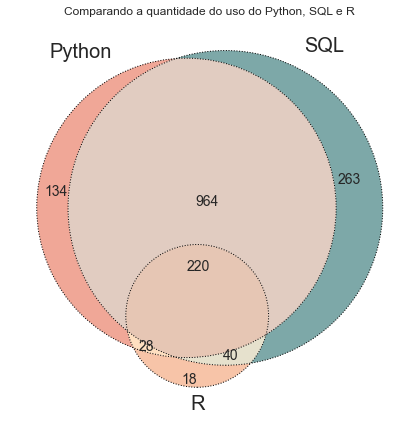

In [118]:
plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["figure.autolayout"] = True
  
# depict venn diagram
out = venn3(subsets=(qtpython, qtsql, qtuniaoPySQL, qtr, qtuniaoPyR, qtuniaoRSQL, qtuniao3), 
      set_labels=('Python', 'SQL', 'R'), 
      set_colors=("#eb826b", "#468484", "#f4ac84"), alpha=0.7)
  
# outline of circle line style and width
venn3_circles(subsets=(qtpython, qtsql, qtuniaoPySQL, qtr, qtuniaoPyR, qtuniaoRSQL, qtuniao3), 
              linestyle="dotted", linewidth=1)
  

for text in out.set_labels:
    text.set_fontsize(20)
for x in range(len(out.subset_labels)):
    if out.subset_labels[x] is not None:
        out.subset_labels[x].set_fontsize(14)
    
    
# title of the venn diagram
plt.title("Comparando a quantidade do uso do Python, SQL e R")
plt.show()

## Bancos de Dados
  
  Quais dos bancos de dados/fontes de dados listados abaixo você utiliza no trabalho?

In [303]:
colunas_banco_dados = [coluna for coluna in df.columns if 'P4_f_' in coluna]
dfBancoDados = df.loc[:, colunas_banco_dados]

pesquisa = ".*'(\W){3}(.+?(?='\)))"
dicio_banco_dados = {}

for coluna in colunas_banco_dados:
    dfBancoDados[coluna] = df[coluna].fillna(0).astype(np.int64)  
    resultado = re.search(pesquisa, coluna)
    nome_coluna = resultado.group(2)
    dicio_banco_dados[nome_coluna] = dfBancoDados[coluna].sum()

# dicionário para DataFrame
dfBancoDados = pd.DataFrame(list(dicio_banco_dados.items()),columns = ['Banco de Dados','Quantidade']) 
dfBancoDados.sort_values(by='Quantidade', ascending=False)

,Banco de Dados,Quantidade
2,SQL SERVER,628
12,PostgreSQL,553
0,MySQL,523
11,S3,367
1,Oracle,355
22,Google BigQuery,340
27,Databricks,232
24,Amazon Redshift,225
8,MongoDB,216
25,Amazon Athena,208


Text(0.5, 1.0, 'Faixa Salarial x MongoDB')

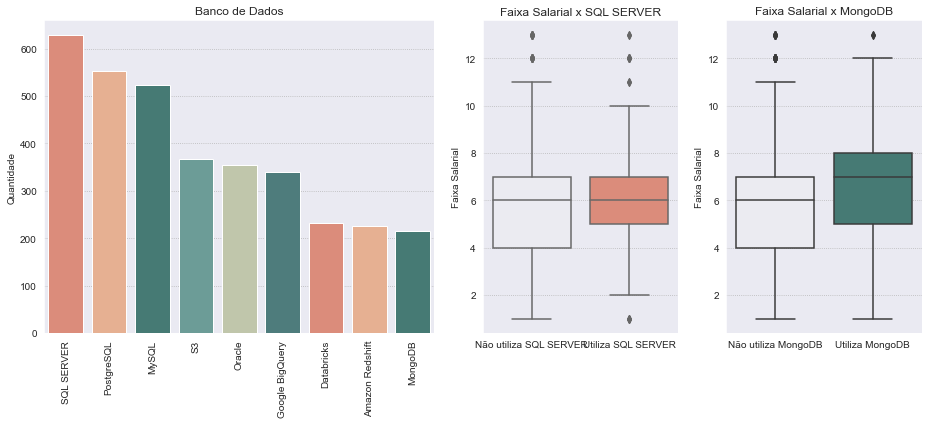

In [304]:
figura, graficos = plt.subplots(1, 3, gridspec_kw={'width_ratios': [2,1,1]}, figsize=(13,6), tight_layout=True)

# countplot
ax = sns.barplot(data=dfBancoDados.sort_values(by='Quantidade', ascending=False).head(9), x="Banco de Dados", y="Quantidade", palette=['#eb826b','#f4ac84','#3d837b','#64a49d','#c3caa7','#468484','#eb826b','#f4ac84','#3d837b'], ax=graficos[0])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set(xlabel='', ylabel='Quantidade')
ax.set_title('Banco de Dados')

# boxplot
ax = sns.boxplot(data=df, y="faixa_salarial", x=df["('P4_f_c ', 'SQL SERVER')"], palette=['#eaeaf2','#eb826b'], ax=graficos[1])
ax.set(xticklabels = (['Não utiliza SQL SERVER', 'Utiliza SQL SERVER']))
ax.set(xlabel='', ylabel='Faixa Salarial')
ax.set_title('Faixa Salarial x SQL SERVER')

ax = sns.boxplot(data=df, y="faixa_salarial", x=df["('P4_f_i ', 'MongoDB')"], palette=['#eaeaf2','#3d837b'], ax=graficos[2])
ax.set(xticklabels = (['Não utiliza MongoDB', 'Utiliza MongoDB']))
ax.set(xlabel='', ylabel='Faixa Salarial')
ax.set_title('Faixa Salarial x MongoDB')


## Clouds

Quais das opções de Cloud listadas abaixo você utiliza no trabalho?

In [306]:
colunas_cloud = [coluna for coluna in df.columns if 'P4_g_' in coluna]
dfCloud = df.loc[:, colunas_cloud]

pesquisa = ".*'(\W){3}(.+?(?='\)))"
dicio_cloud = {}

for coluna in colunas_cloud:
    dfCloud[coluna] = df[coluna].fillna(0).astype(np.int64)  
    resultado = re.search(pesquisa, coluna)
    nome_coluna = resultado.group(2)
    dicio_cloud[nome_coluna] = dfCloud[coluna].sum()

dfCloud = pd.DataFrame(list(dicio_cloud.items()),columns = ['Cloud','Quantidade']) 
dfCloud.sort_values(by='Quantidade', ascending=False)

,Cloud,Quantidade
0,Amazon Web Services (AWS),786
2,Azure (Microsoft),498
1,Google Cloud (GCP),448
5,Servidores On Premise/Não utilizamos Cloud,433
6,Cloud Própria,149
3,Oracle Cloud,65
4,IBM,35


Text(0.5, 1.0, 'Faixa Salarial x GCP')

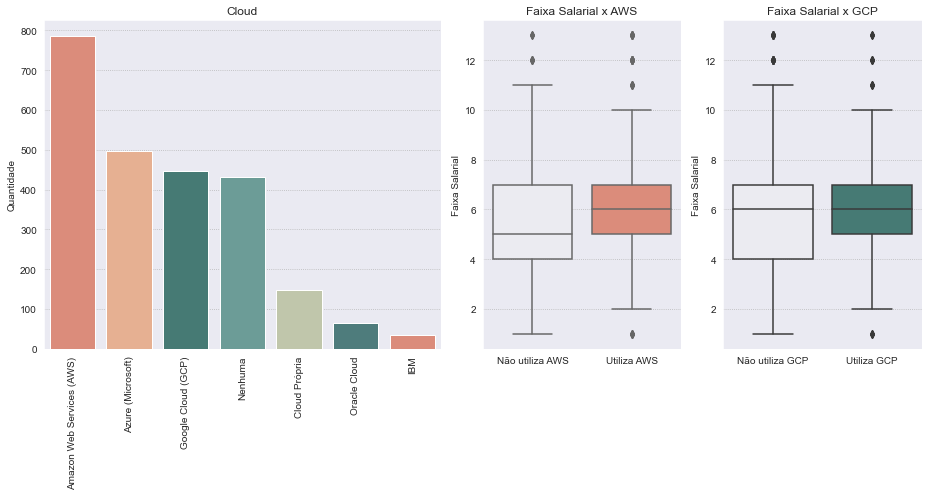

In [307]:
dfCloud.loc[dfCloud["Cloud"] == 'Servidores On Premise/Não utilizamos Cloud', "Cloud"] = 'Nenhuma'

figura, graficos = plt.subplots(1, 3, gridspec_kw={'width_ratios': [2,1,1]}, figsize=(13,7), tight_layout=True)

# countplot
ax = sns.barplot(data=dfCloud.sort_values(by='Quantidade', ascending=False), x="Cloud", y="Quantidade", palette=['#eb826b','#f4ac84','#3d837b','#64a49d','#c3caa7','#468484','#eb826b','#f4ac84','#3d837b'], ax=graficos[0])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set(xlabel='', ylabel='Quantidade')
ax.set_title('Cloud')

# boxplot
ax = sns.boxplot(data=df, y="faixa_salarial", x=df["('P4_g_a ', 'Amazon Web Services (AWS)')"], palette=['#eaeaf2','#eb826b'], ax=graficos[1])
ax.set(xticklabels = (['Não utiliza AWS', 'Utiliza AWS']))
ax.set(xlabel='', ylabel='Faixa Salarial')
ax.set_title('Faixa Salarial x AWS')

ax = sns.boxplot(data=df, y="faixa_salarial", x=df["('P4_g_b ', 'Google Cloud (GCP)')"], palette=['#eaeaf2','#3d837b'], ax=graficos[2])
ax.set(xticklabels = (['Não utiliza GCP', 'Utiliza GCP']))
ax.set(xlabel='', ylabel='Faixa Salarial')
ax.set_title('Faixa Salarial x GCP')


## Ferramentas BI
  
  Quais as Ferramentas de Business Intelligence você utiliza no trabalho?

In [308]:
colunas_bi = [coluna for coluna in df.columns if 'P4_h_' in coluna]
dfBi = df.loc[:, colunas_bi]

pesquisa = ".*'(\W){3}(.+?(?='\)))"
dicio_bi = {}

for coluna in colunas_bi:
    dfBi[coluna] = df[coluna].fillna(0).astype(np.int64)  
    resultado = re.search(pesquisa, coluna)
    nome_coluna = resultado.group(2)
    dicio_bi[nome_coluna] = dfBi[coluna].sum()

dfBi = pd.DataFrame(list(dicio_bi.items()),columns = ['Ferramentas BI','Quantidade']) 
dfBi.sort_values(by='Quantidade', ascending=False)

,Ferramentas BI,Quantidade
0,Microsoft PowerBI,974
2,Tableau,335
16,Google Data Studio,334
21,Fazemos todas as análises utilizando apenas Ex...,223
22,Não utilizo nenhuma ferramenta de BI no trabalho,208
3,Metabase,207
18,Grafana,139
1,Qlik View/Qlik Sense,118
15,Looker,117
20,Pentaho,97


Text(0.5, 1.0, 'Faixa Salarial x Google DS')

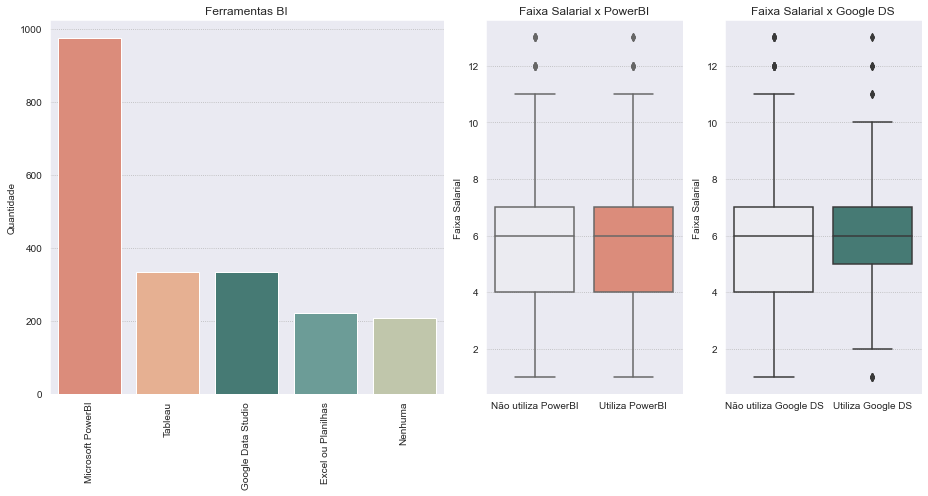

In [309]:
dfBi.loc[dfBi["Ferramentas BI"] == 'Fazemos todas as análises utilizando apenas Excel ou planilhas do google', "Ferramentas BI"] = 'Excel ou Planilhas'
dfBi.loc[dfBi["Ferramentas BI"] == 'Não utilizo nenhuma ferramenta de BI no trabalho', "Ferramentas BI"] = 'Nenhuma'

figura, graficos = plt.subplots(1, 3, gridspec_kw={'width_ratios': [2,1,1]}, figsize=(13,7), tight_layout=True)

# countplot
ax = sns.barplot(data=dfBi.sort_values(by='Quantidade', ascending=False).head(5), x="Ferramentas BI", y="Quantidade", palette=['#eb826b','#f4ac84','#3d837b','#64a49d','#c3caa7','#468484','#eb826b','#f4ac84','#3d837b'], ax=graficos[0])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set(xlabel='', ylabel='Quantidade')
ax.set_title('Ferramentas BI')

# boxplot
ax = sns.boxplot(data=df, y="faixa_salarial", x=df["('P4_h_a ', 'Microsoft PowerBI')"], palette=['#eaeaf2','#eb826b'], ax=graficos[1])
ax.set(xticklabels = (['Não utiliza PowerBI', 'Utiliza PowerBI']))
ax.set(xlabel='', ylabel='Faixa Salarial')
ax.set_title('Faixa Salarial x PowerBI')

ax = sns.boxplot(data=df, y="faixa_salarial", x=df["('P4_h_q ', 'Google Data Studio')"], palette=['#eaeaf2','#3d837b'], ax=graficos[2])
ax.set(xticklabels = (['Não utiliza Google DS', 'Utiliza Google DS']))
ax.set(xlabel='', ylabel='Faixa Salarial')
ax.set_title('Faixa Salarial x Google DS')


# <font color="#690fad">Conclusões</font>
----------

**Os maiores salários estão aqui:**<br>
- Faixa etária entre 45 e 49 anos;
- No Brasil, moradores da região Sudeste apresentam maiores salários;
- A remuneração é maior para os profissionais que trabalham para empresas do Exterior, independente se moram ou não no Brasil;
- Profissionais com Pós-graduação/Mestrado/Doutorado apresentaram remuneração superior aos dos que possuem ou não Graduação/Bacharelado;
- O setor que apresentou a melhor remuneração foi o de Entretenimento/Esportes seguido de Ecommerce e Setor Público;
- Pessoas com cargo de Gestor apresentam salários superiores aos que não possuem cargo de gestão;
- Profissionais de nível Sênior apresentam maiores salários;
- A experiência na área de dados apresenta-se proporcional ao valor da remuneração. Quanto maior a experiência, maior o salário.
- O modelo de trabalho que apresentou melhor remuneração foi o híbrido com dias flexíveis de trabalho presencial;
- Cientista de Dados e Engenheiro de Dados apresentam salários superiores aos Analistas de Dados;
- Profissionais que trabalham com fonte de dados não relacionais (NoSQL) apresentaram remuneração pouco superior aos que trabalham com fonte de dados relacionais (SQL);
- As linguagens mais utilizadas pelos respondentes foram o Python e o SQL;
- O Banco de Dados mais utilizado foi o SQL Server. Profissionais que trabalham com MongoDB apresentaram remuneração pouco superior;
- A remuneração dos profissionais que trabalham com Cloud, principalmente AWS, Azure e Google, é semelhante;
- Também é semelhante a remuneração dos profissionais que utilizam ferramentas BI, principalmente PowerBI, Tableau e Google Data Studio.